In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection  of high-level mathematical functions to operate on these arrays.
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
%matplotlib inline
#Plotly provides number of trace objects such as scatter, bar, pie, heatmap etc. and each is returned by respective functions in graph_objs functions.
import plotly.graph_objs as go
#To create subplots
from plotly.subplots import make_subplots
#The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.
import plotly.express as px
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
#This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
import seaborn as sns;sns.set(style="ticks", color_codes=True)
#Requests is a HTTP library for the Python programming language. The goal of the project is to make HTTP requests simpler and more human-friendly.
import requests
# The io module provides Python’s main facilities for dealing with various types of I/O. There are three main types of I/O: text I/O, binary I/O and raw I/O.
import io
# To work with date time variables
import datetime as dt

Data 
https://drive.google.com/file/d/1Ml7uAb3aR_R6JZ2DJT4q5jjtSs9TmMQH/view?usp=sharing 


In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)
# Setting this option will print all of the data in a row
pd.set_option('display.max_rows',None)

In [3]:
#Read the data from source
supply_chain = pd.read_csv("F:\Projects_Arranged\Smart_supply_chain\DataCoSupplyChainDataset.csv",encoding = 'latin1')
supply_chain.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [4]:
supply_chain.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
#After understanding the data properly now we know which features are important to work on so in the part we will delete the duplicates and not required features
supply_chain_copy = supply_chain.copy()
list_of_features = ['Type',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country','Customer Id','Customer Segment',
       'Customer State','Customer Zipcode','Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Description', 'Product Image', 'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']
df = supply_chain_copy[list_of_features]
df.head()

Type  Benefit per order  Sales per customer   Delivery Status  \
0     DEBIT          91.250000          314.640015  Advance shipping   
1  TRANSFER        -249.089996          311.359985     Late delivery   
2      CASH        -247.779999          309.720001  Shipping on time   
3     DEBIT          22.860001          304.809998  Advance shipping   
4   PAYMENT         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  \
0                   0  Sporting Goods        Caguas      Puerto Rico   
1                   1  Sporting Goods        Caguas      Puerto Rico   
2                   0  Sporting Goods      San Jose          EE. UU.   
3                   0  Sporting Goods   Los Angeles          EE. UU.   
4                   0  Sporting Goods        Caguas      Puerto Rico   

   Customer Id Customer Segment Customer State  Customer Zipcode  \
0        20755         Consumer             PR             725.0   
1        19492         Consumer             PR             725.0   
2        19491         Consumer             CA           95125.0   
3        19490      Home Office             CA           90027.0   
4        19489        Corporate             PR             725.0   

  Department Name   Latitude   Longitude        Market  Order City  \
0         Fitness  18.251453  -66.037056  Pacific Asia      Bekasi   
1         Fitness  18.279451  -66.037064  Pacific Asia     Bikaner   
2         Fitness  37.292233 -121.881279  Pacific Asia     Bikaner   
3         Fitness  34.125946 -118.291016  Pacific Asia  Townsville   
4         Fitness  18.253769  -66.037048  Pacific Asia  Townsville   

  Order Country  Order Customer Id order date (DateOrders)  Order Id  \
0     Indonesia              20755         1/31/2018 22:56     77202   
1         India              19492         1/13/2018 12:27     75939   
2         India              19491         1/13/2018 12:06     75938   
3     Australia              19490         1/13/2018 11:45     75937   
4     Australia              19489         1/13/2018 11:24     75936   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360            13.110000                      0.04   
1                    1360            16.389999                      0.05   
2                    1360            18.030001                      0.06   
3                    1360            22.940001                      0.07   
4                    1360            29.500000                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  \
0                    1  327.75        314.640015               91.250000   
1                    1  327.75        311.359985             -249.089996   
2                    1  327.75        309.720001             -247.779999   
3                    1  327.75        304.809998               22.860001   
4                    1  327.75        298.250000              134.210007   

     Order Region      Order State     Order Status  Order Zipcode  \
0  Southeast Asia  Java Occidental         COMPLETE            NaN   
1      South Asia         Rajastán          PENDING            NaN   
2      South Asia         Rajastán           CLOSED            NaN   
3         Oceania       Queensland         COMPLETE            NaN   
4         Oceania       Queensland  PENDING_PAYMENT            NaN   

   Product Card Id  Product Category Id  Product Description  \
0             1360                   73             

In [6]:
df.shape

(180519, 44)

## Data Visualization

### 1. Delivery Status
- a) Delivery Status vs Order Id (Bar, Pie)
- b) Delivery Status vs Order Id (Bar,color = Order Region)

### 2. Top 20 Customers
- a) Customer Id vs Order Id (Bar) - With respect to quantity of Orders
- b) Customer Id vs Order Profit Per Order (Bar) - With respect to profit of Orders

### 3. Customer Segment
- a) Customer Segment vs Order Id (Bar)

### 4. Category
- a) Category Name vs Order Id (Bar)

### 5. Geography
- a) Order Region vs Order Id (Bar)
- b) Order Country vs Order Id (Bar)
- c) [Order Country, Order State, Order City] vs Order Id (Treemap)
- d) Profit based on Order Country and Order City (Bar)

### 6. Top 10 Sales Analysis
- a) Order Country vs Sales (Bar)
- b) Product Name vs Sales (Bar)
- c) Product Name vs Sales (Bar,color=Delivery Status)
- d) Product Name vs Sales (Bar,color-Order Region)
- e) Category Name vs Sales (Bar)
- f) Type vs Sales (pie)
- g) Type vs Sales (Bar,color=Product Name)

### 7. DateTime vs Sales
- a) Year vs Sales (line)
- b) Quarter vs Sales (line)
- c) Month vs Sales (bar)

### 8.Others
- a) Department Name vs Order Id (Bar)
- b) Order Status vs Order Id (Bar)
- c) Customer Country, State, City vs Order Id (Treemap)
- d) Category Name vs Order Item Discount Rate (Bar)

# Data Visualization

## 1. Delivary Status

#### a) Delivery Status vs Order Id

In [7]:
df_delivery_status_orderID = df.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_delivery_status_orderID

Delivery Status  Number of Orders
1      Late delivery             98977
0   Advance shipping             41592
3   Shipping on time             32196
2  Shipping canceled              7754

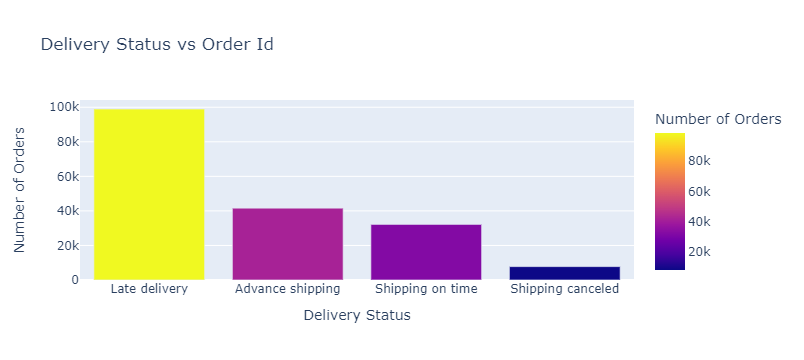

In [8]:
px.bar(df_delivery_status_orderID,x='Delivery Status',y='Number of Orders',color=df_delivery_status_orderID['Number of Orders'],title='Delivery Status vs Order Id')

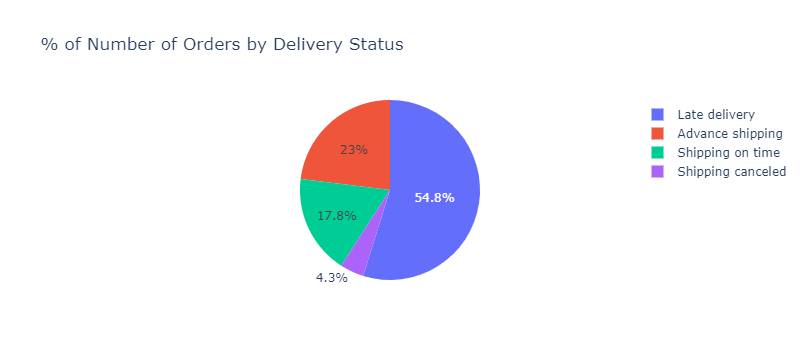

In [9]:
px.pie(df_delivery_status_orderID,values='Number of Orders',names='Delivery Status',title='% of Number of Orders by Delivery Status')

#### b) Delivery Status vs Order Id (color = Order Region)

In [10]:
df_delivary_status_orderID_orderRegion = df.groupby(['Delivery Status','Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_delivary_status_orderID_orderRegion

Delivery Status     Order Region  Number of Orders
26      Late delivery  Central America             15518
45      Late delivery   Western Europe             15140
35      Late delivery    South America              8111
3    Advance shipping  Central America              6566
22   Advance shipping   Western Europe              6138
34      Late delivery          Oceania              5482
38      Late delivery   Southeast Asia              5297
33      Late delivery  Northern Europe              5292
40      Late delivery  Southern Europe              5129
72   Shipping on time  Central America              5090
91   Shipping on time   Western Europe              4589
24      Late delivery        Caribbean              4415
36      Late delivery       South Asia              4350
44      Late delivery     West of USA               4313
30      Late delivery     Eastern Asia              3955
29      Late delivery      East of USA              3849
12   Advance shipping    South America              3476
43      Late delivery        West Asia              3322
41      Late delivery       US Center               3252
81   Shipping on time    South America              2597
10   Advance shipping  Northern Europe              2341
11   Advance shipping          Oceania              2324
37      Late delivery   South of  USA               2256
17   Advance shipping  Southern Europe              2246
15   Advance shipping   Southeast Asia              2208
31      Late delivery   Eastern Europe              2182
1    Advance shipping        Caribbean              1997
42      Late delivery      West Africa              1953
80   Shipping on time          Oceania              1927
21   Advance shipping     West of USA               1835
79   Shipping on time  Northern Europe              1775
13   Advance shipping       South Asia              1765
32      Late delivery     North Africa              1762
7    Advance shipping     Eastern Asia              1754
86   Shipping on time  Southern Europe              1655
84   Shipping on time   Southeast Asia              1631
6    Advance shipping      East of USA              1560
70   Shipping on time        Caribbean              1539
90   Shipping on time     West of USA               1447
82   Shipping on time       South Asia              1340
20   Advance shipping        West Asia              1310
76   Shipping on time     Eastern Asia              1264
68  Shipping canceled   Western Europe              1242
18   Advance shipping       US Center               1227
75   Shipping on time      East of USA              1208
87   Shipping on time       US Center               1174
49  Shipping canceled  Central America              1167
89   Shipping on time        West Asia              1114
28      Late delivery      East Africa              1036
25      Late delivery   Central Africa               972
14   Advance shipping   South of  USA                927
8    Advance shipping   Eastern Europe               879
19   Advance shipping      West Africa               849
88   Shipping on time      West Africa               769
9    Advance shipping     North Africa               760
58  Shipping canceled    South America               751
77   Shipping on time   Eastern Europe               724
83   Shipping on time   South of  USA                672
39      Late delivery  Southern Africa               617
78   Shipping on time     North Africa               564
23      Late delivery           Canada               468
57  Shipping canceled          Oceania               415
61  Shipping canceled   Southeast Asia               403
63  Shipping canceled  Southern Europe               401
5    Advance shipping      East Africa               399
67  Shipping canceled     West of USA                398
56  Shipping canceled  Northern Europe               384
47  Shipping canceled        Caribbean               367
2    Advance shipping   Central Africa               354
74   Shipping on

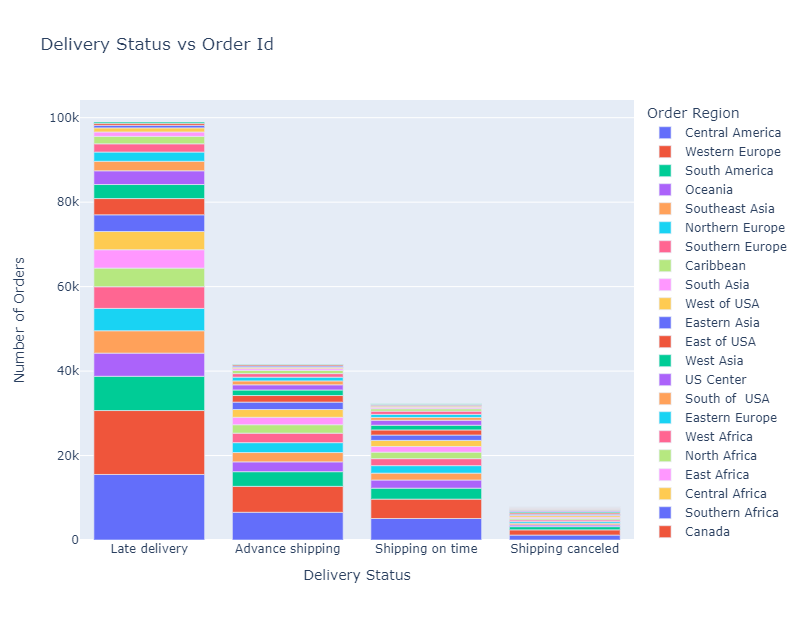

In [11]:
px.bar(df_delivary_status_orderID_orderRegion, x='Delivery Status', y='Number of Orders'  , color='Order Region',height=620,title='Delivery Status vs Order Id')

- Conclusion : From this we conclude that there are 98977 late deliveries out of them Central America and Western Europe have the most late delivered orders.

## 2. Top 20 Customers

#### a) Customer Id vs Order Id - With respect to quantity of Orders

In [12]:
df['Customer Id_string'] = df['Customer Id'].astype(str)
df_customers_orderID = df.groupby(['Customer Id_string'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_customers_orderID.head(20)

C:\Users\avita\AppData\Local\Temp\ipykernel_28040\1804021419.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Customer Id_string  Number of Orders
15859               5654                47
15143               5004                45
651                10591                45
15927               5715                44
19958               9371                44
13712               3708                44
18350                791                43
4892                1443                43
12538               2641                43
2513               12284                43
12897               2970                42
7266                1657                42
13715               3710                42
5125                1464                42
6499                1588                42
263                10235                42
3170                1288                42
1171               11065                41
15852               5648                41
18466               8015                40

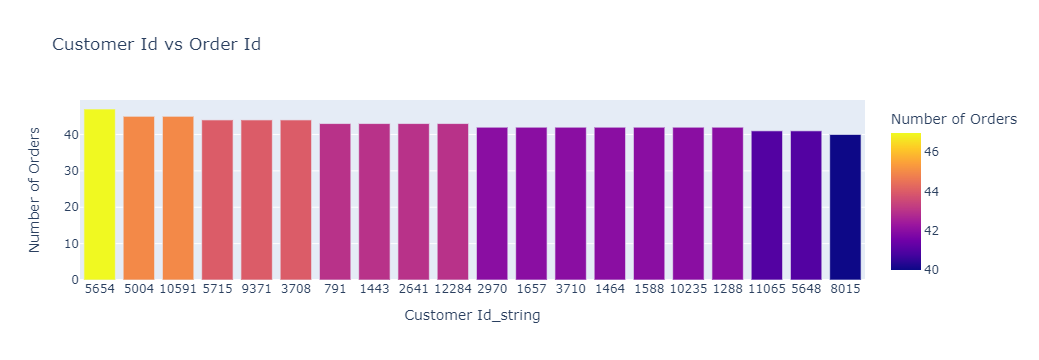

In [13]:
px.bar(df_customers_orderID.head(20),x='Customer Id_string',y='Number of Orders',color='Number of Orders',title='Customer Id vs Order Id')

#### b) Customer Id vs Order Profit Per Order - With respect to profit of Orders

In [14]:
df['Customer Id_string'] = df['Customer Id'].astype(str)
df_customers_profit = df.groupby(['Customer Id_string'])['Order Profit Per Order'].sum().reset_index(name = 'Profit of Orders').sort_values(by='Profit of Orders',ascending=False)
df_customers_profit.head(20)

C:\Users\avita\AppData\Local\Temp\ipykernel_28040\3973818738.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Customer Id_string  Profit of Orders
12538               2641       2441.970003
7266                1657       2196.919992
20469               9833       1938.390015
12521               2626       1928.570015
15143               5004       1917.990002
13742               3735       1906.360009
17887                749       1855.149989
15755               5560       1831.460010
1061               10967       1822.330006
15197               5053       1813.339999
12078               2224       1799.869997
15332               5175       1754.480002
2449               12226       1717.290003
1630                1148       1716.959974
19954               9368       1700.639988
651                10591       1698.589993
15379               5217       1698.080007
17009               6696       1696.079987
12712               2800       1680.449997
12626               2723       1674.829992

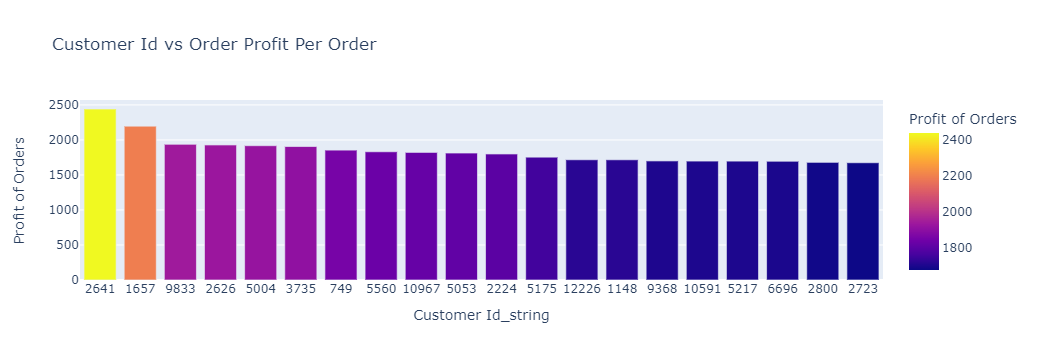

In [15]:
px.bar(df_customers_profit.head(20),x='Customer Id_string',y='Profit of Orders',color='Profit of Orders',title='Customer Id vs Order Profit Per Order')

## 3. Customer Segment

#### a) Customer Segment vs Order Id

In [16]:
df_customer_segment_orderID = df.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_customer_segment_orderID

Customer Segment  Number of Orders
0         Consumer             93504
1        Corporate             54789
2      Home Office             32226

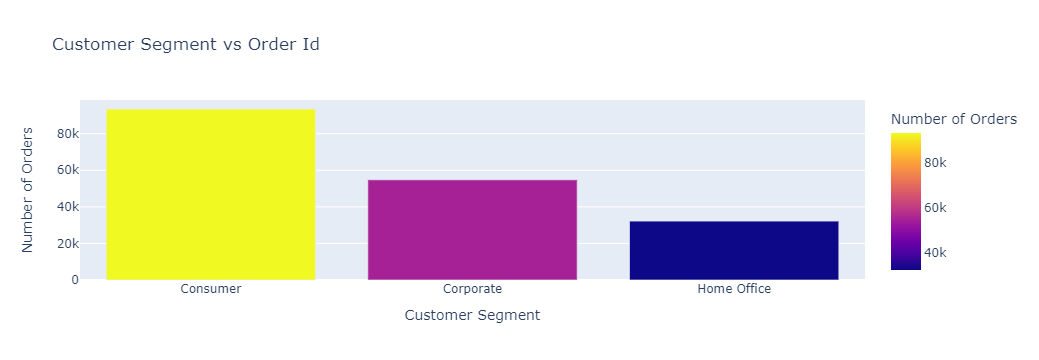

In [17]:
px.bar(df_customer_segment_orderID,x='Customer Segment',y='Number of Orders',color='Number of Orders',title='Customer Segment vs Order Id')

## 4. Category

#### a) Category Name vs Order Id

In [18]:
df_category_name_orderID = df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_category_name_orderID

Category Name  Number of Orders
12                Cleats             24551
34        Men's Footwear             22246
47       Women's Apparel             21035
30  Indoor/Outdoor Games             19298
18               Fishing             17325
46          Water Sports             15540
9       Camping & Hiking             13729
10      Cardio Equipment             12487
38         Shop By Sport             10984
17           Electronics              3156
0            Accessories              1780
24            Golf Balls              1475
21        Girls' Apparel              1201
25           Golf Gloves              1070
44              Trade-In               974
45           Video Games               838
11   Children's Clothing               652
48      Women's Clothing               650
3    Baseball & Softball               632
28                Hockey               614
8               Cameras                592
43                  Toys               529
26            Golf Shoes               524
37          Pet Supplies               492
15                Crafts               484
20                Garden               484
16                  DVDs               483
13             Computers               442
22          Golf Apparel               441
29    Hunting & Shooting               440
36                 Music               434
14  Consumer Electronics               431
6           Boxing & MMA               423
5                 Books                405
31      Kids' Golf Clubs               384
27     Health and Beauty               362
40        Sporting Goods               357
32              Lacrosse               343
42      Tennis & Racquet               328
19   Fitness Accessories               309
35      Men's Golf Clubs               283
7                   CDs                271
33        Men's Clothing               208
2                  Baby                207
49    Women's Golf Clubs               181
39                Soccer               138
41     Strength Training               111
1        As Seen on  TV!                68
4             Basketball                67
23     Golf Bags & Carts                61

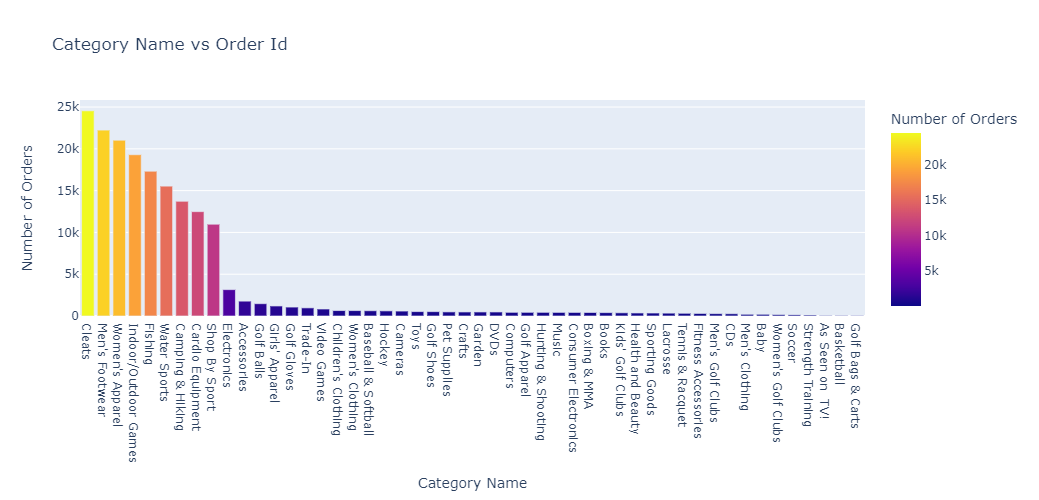

In [19]:
px.bar(df_category_name_orderID,x='Category Name',y='Number of Orders',color='Number of Orders',title='Category Name vs Order Id',height=500)

## 5. Geography

#### a) Order Region vs Order Id

In [20]:
df_region_orderID = df.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_region_orderID

Order Region  Number of Orders
3   Central America             28341
22   Western Europe             27109
12    South America             14935
11          Oceania             10148
10  Northern Europe              9792
15   Southeast Asia              9539
17  Southern Europe              9431
1         Caribbean              8318
21     West of USA               7993
13       South Asia              7731
7      Eastern Asia              7280
6       East of USA              6915
20        West Asia              6009
18       US Center               5887
14   South of  USA               4045
8    Eastern Europe              3920
19      West Africa              3696
9      North Africa              3232
5       East Africa              1852
2    Central Africa              1677
16  Southern Africa              1157
0            Canada               959
4      Central Asia               553

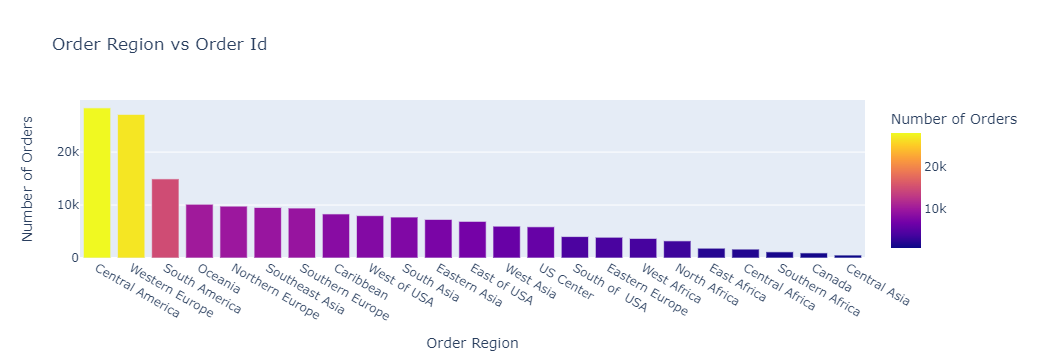

In [21]:
px.bar(df_region_orderID,x='Order Region',y='Number of Orders',color='Number of Orders',title='Order Region vs Order Id')

#### b) Order Country vs Order Id

In [22]:
df_country_orderID = df.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_country_orderID

Order Country  Number of Orders
48                    Estados Unidos             24840
53                           Francia             13222
102                           México             13172
2                           Alemania              9564
8                          Australia              8497
20                            Brasil              7987
120                      Reino Unido              7302
31                             China              5758
75                            Italia              4989
69                             India              4783
70                         Indonesia              4204
47                            España              3868
42                       El Salvador              3726
124             República Dominicana              3669
66                          Honduras              3629
38                              Cuba              3534
152                          Turquía              3395
105                        Nicaragua              3046
59                         Guatemala              2778
106                          Nigeria              2309
51                         Filipinas              2103
112                           Panamá              1941
115                     Países Bajos              1932
6                          Argentina              1931
33                          Colombia              1771
108                    Nueva Zelanda              1590
73                              Irán              1460
9                            Austria              1387
41                            Egipto              1189
94                         Marruecos              1135
138                        SudAfrica              1099
129                            Rusia              1014
123  República Democrática del Congo              1010
158                        Venezuela               984
71                              Irak               976
154                          Ucrania               967
28                            Canada               959
141                           Suecia               929
145                        Tailandia               909
4                       Arabia Saudí               860
116                             Perú               764
77                             Japón               758
111                         Pakistán               758
159                          Vietnam               757
30                             Chile               738
25                           Bélgica               664
117                          Polonia               641
34                     Corea del Sur               583
92                           Malasia               544
65                             Haití               534
5                            Argelia               516
72                           Irlanda               491
11                         Bangladés               466
128                          Rumania               455
133                         Singapur               455
101               Myanmar (Birmania)               409
147                         Tanzania               378
118                         Portugal               343
107                          Noruega               333
142                            Suiza               330
3                             Angola               306
40                           Ecuador               294
52                         Finlandia               290
39                         Dinamarca               285
27                           Camerún               275
79                        Kazajistán               274
162                           Zambia               266
74                            Israel               265
56                             Ghana               264
130                          Senegal               263
36                   Costa de Marfil               257
139                            Sudán               251
100     

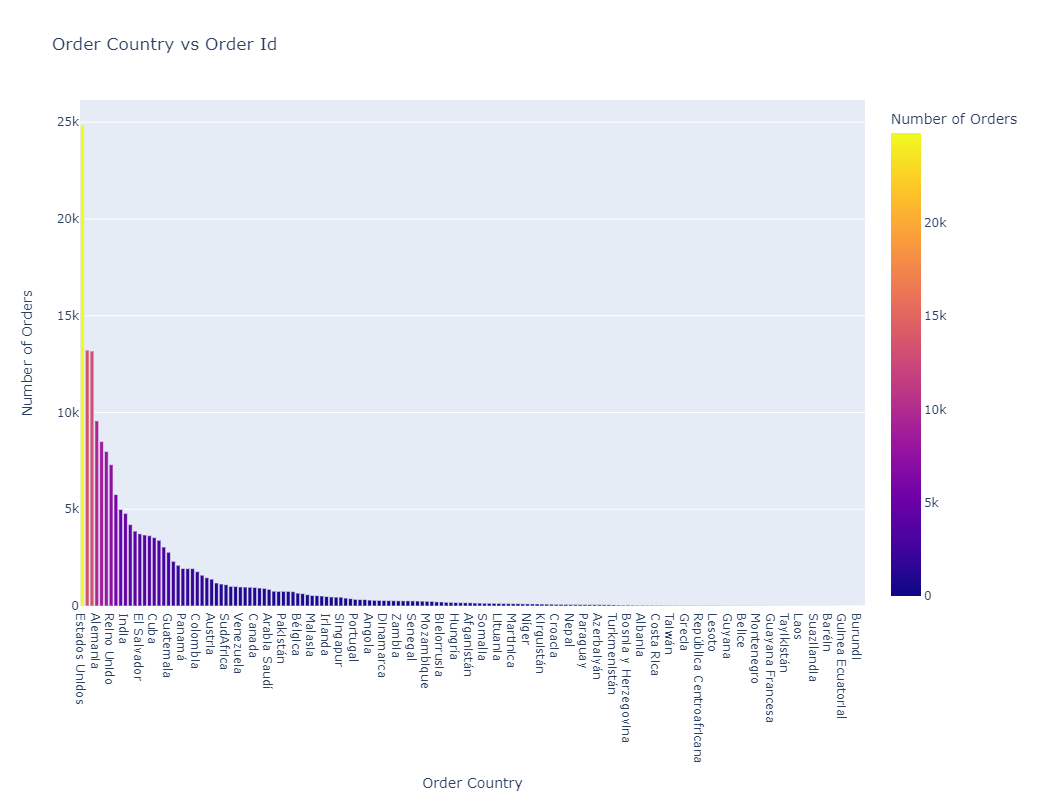

In [23]:
px.bar(df_country_orderID,x='Order Country',y='Number of Orders',color='Number of Orders',height=800,title='Order Country vs Order Id')

#### c) (Order Country, Order State, Order City) vs Order Id

In [24]:
df_country_state_city_orderID = df.groupby(['Order Country','Order State','Order City'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_country_state_city_orderID.head()

Order Country        Order State     Order City  Number of Orders
3366  República Dominicana      Santo Domingo  Santo Domingo              2211
1588        Estados Unidos         Nueva York  New York City              2202
1259        Estados Unidos         California    Los Angeles              1845
2241              Honduras  Francisco Morazán    Tegucigalpa              1783
2943             Nicaragua            Managua        Managua              1682

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



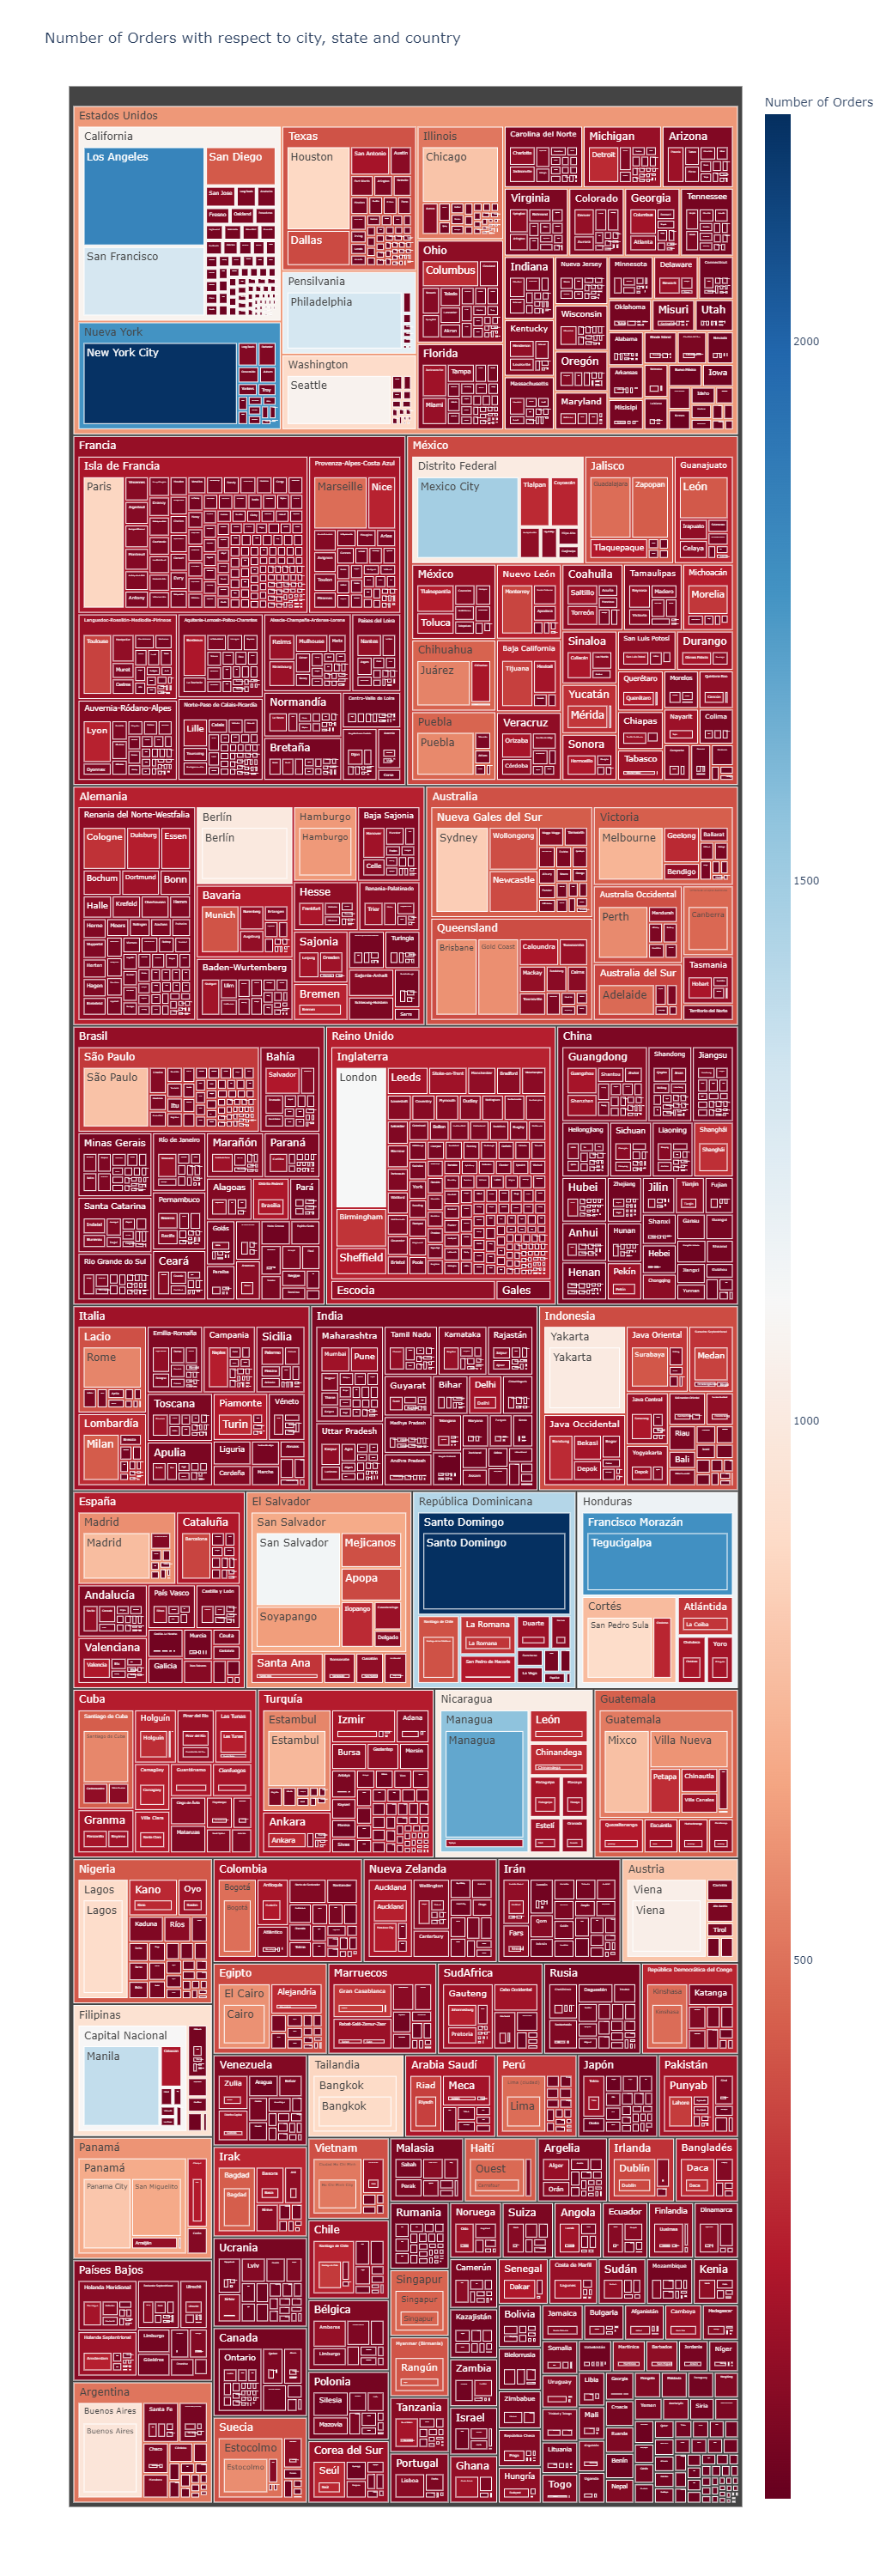

In [25]:
px.treemap(data_frame=df_country_state_city_orderID,path=['Order Country','Order State','Order City'],values='Number of Orders',height=3000,color='Number of Orders',color_continuous_scale='RdBu',title='Number of Orders with respect to city, state and country')


#### d) Profit based on Order Country and Order City

In [26]:
df_profit_country_city = df.groupby(['Order Country','Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders',ascending=False)
df_profit_country_city.head(20)

Order Country     Order City  Profit of Orders
3260  República Dominicana  Santo Domingo      51111.670019
1492        Estados Unidos  New York City      47889.759868
2152              Honduras    Tegucigalpa      40973.640056
1430        Estados Unidos    Los Angeles      38014.360024
2837             Nicaragua        Managua      34319.950107
2771                México    Mexico City      33523.450009
3155           Reino Unido         London      32281.599991
1703             Filipinas         Manila      31194.520013
1536        Estados Unidos   Philadelphia      26661.430046
2344             Indonesia        Yakarta      26414.899994
304                Austria          Viena      25937.880032
1139                España         Madrid      25519.480005
1598        Estados Unidos  San Francisco      23243.620261
203              Argentina   Buenos Aires      23237.500040
3417             Tailandia        Bangkok      22552.069923
2861               Nigeria          Lagos      22284.999902
573                 Brasil      São Paulo      21554.380040
287              Australia         Sydney      21132.100044
1993               Francia          Paris      20782.739977
1612        Estados Unidos        Seattle      20755.650093

In [27]:
df_profit_country_city.shape

(3665, 3)

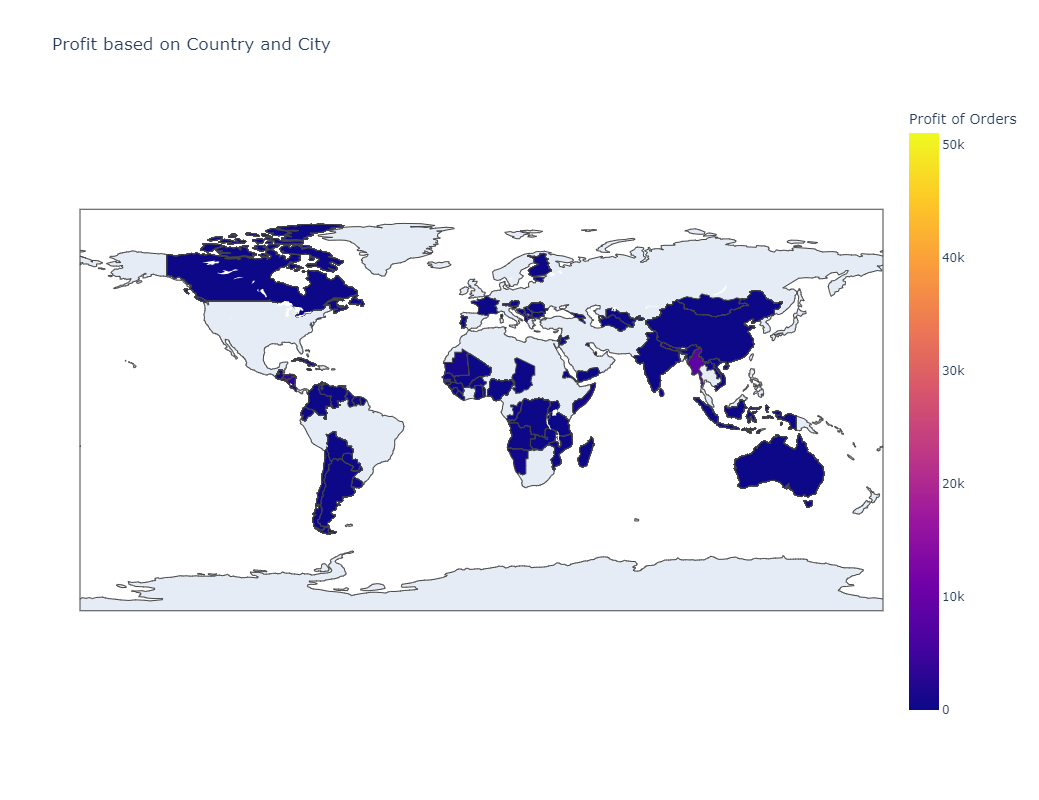

In [28]:
fig = px.choropleth(df_profit_country_city,
                    locationmode='country names',
                    locations='Order Country',
                    color='Profit of Orders',
                    hover_data=['Order City'],
                    hover_name='Order Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    range_color=[0,df_profit_country_city['Profit of Orders'].max()],
                    title='Profit based on Country and City',
                    width=1000,
                    height=800)
fig.show()

## 6) Sales Analysis

#### a) Order Country vs Sales

In [29]:
df_sales_country = df.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending = False)
df_sales_country.head(10)

Order Country  Sales of Orders
48   Estados Unidos     4.879668e+06
53          Francia     2.879942e+06
102          México     2.633195e+06
2          Alemania     2.074172e+06
8         Australia     1.694622e+06
120     Reino Unido     1.612095e+06
20           Brasil     1.594320e+06
31            China     1.172902e+06
75           Italia     1.072182e+06
69            India     9.623967e+05

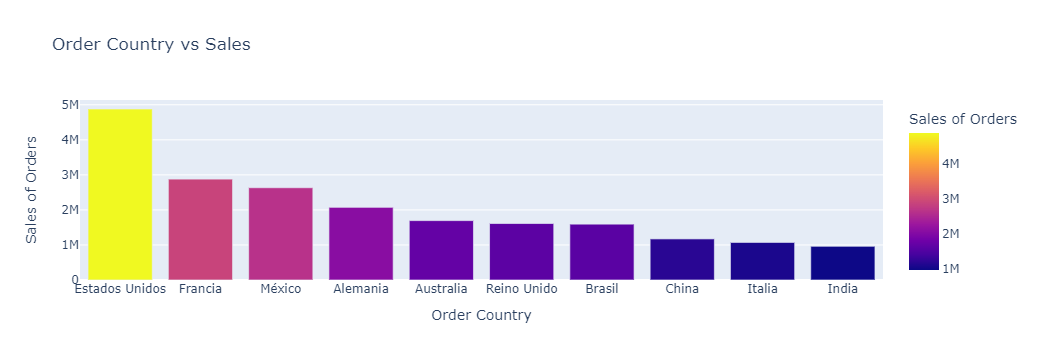

In [30]:
px.bar(df_sales_country.head(10),x='Order Country',y='Sales of Orders',color='Sales of Orders',title='Order Country vs Sales')

#### b) Product Name

In [31]:
df_sales_product = df.groupby(['Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_sales_product.head()

Product Name  Sales of Orders
24      Field & Stream Sportsman 16 Gun Fire Safe     6.929654e+06
71               Perfect Fitness Perfect Rip Deck     4.421143e+06
21  Diamondback Women's Serene Classic Comfort Bi     4.118426e+06
61              Nike Men's Free 5.0+ Running Shoe     3.667633e+06
59           Nike Men's Dri-FIT Victory Golf Polo     3.147800e+06

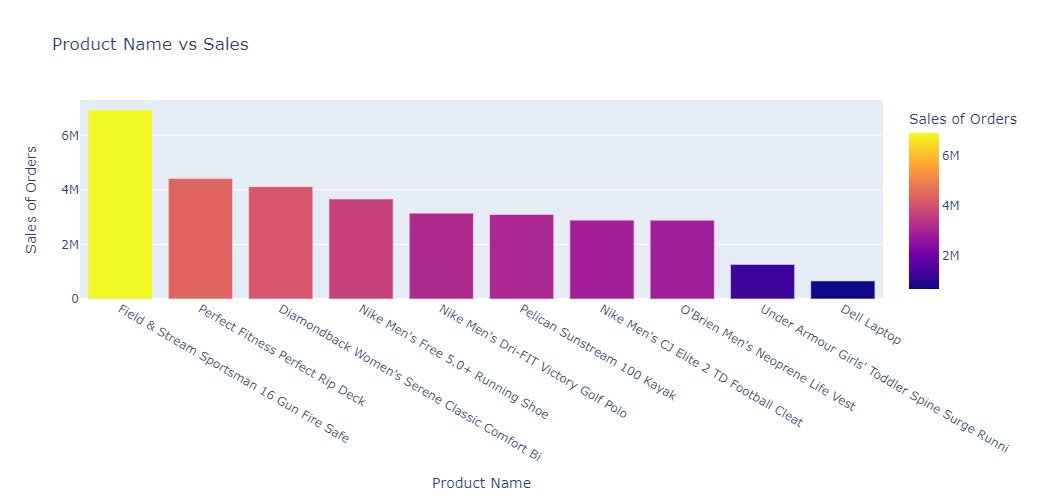

In [32]:
px.bar(df_sales_product.head(10),x='Product Name',y='Sales of Orders',color='Sales of Orders',height=500,title='Product Name vs Sales')

#### c) Product Name vs Sales (color = Delivery Status)

In [33]:
df_sales_product_deliverystatus = df.groupby(['Product Name','Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending= False)
df_sales_product_deliverystatus.head(10)

Product Name   Delivery Status  \
96       Field & Stream Sportsman 16 Gun Fire Safe     Late delivery   
280               Perfect Fitness Perfect Rip Deck     Late delivery   
84   Diamondback Women's Serene Classic Comfort Bi     Late delivery   
242              Nike Men's Free 5.0+ Running Shoe     Late delivery   
234           Nike Men's Dri-FIT Victory Golf Polo     Late delivery   
276                    Pelican Sunstream 100 Kayak     Late delivery   
95       Field & Stream Sportsman 16 Gun Fire Safe  Advance shipping   
266               O'Brien Men's Neoprene Life Vest     Late delivery   
222        Nike Men's CJ Elite 2 TD Football Cleat     Late delivery   
98       Field & Stream Sportsman 16 Gun Fire Safe  Shipping on time   

     Sales of Orders  
96      3.806210e+06  
280     2.421316e+06  
84      2.245950e+06  
242     1.992401e+06  
234     1.719450e+06  
276     1.698315e+06  
95      1.613519e+06  
266     1.583466e+06  
222     1.575609e+06  
98      1.217939e+06

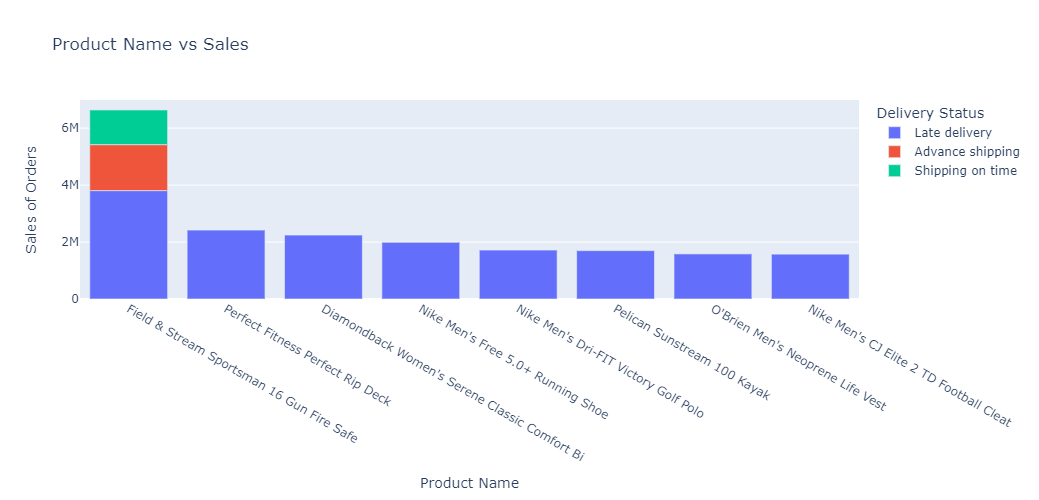

In [34]:
px.bar(df_sales_product_deliverystatus.head(10),x='Product Name',y='Sales of Orders',color='Delivery Status',height=500,title='Product Name vs Sales')

#### d) Product Name vs Sales (color = Order Region)

In [35]:
df_product_region = df.groupby(['Product Name','Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_product_region.head(10)

Product Name     Order Region  \
284      Field & Stream Sportsman 16 Gun Fire Safe  Central America   
303      Field & Stream Sportsman 16 Gun Fire Safe   Western Europe   
873               Perfect Fitness Perfect Rip Deck  Central America   
232  Diamondback Women's Serene Classic Comfort Bi  Central America   
892               Perfect Fitness Perfect Rip Deck   Western Europe   
732              Nike Men's Free 5.0+ Running Shoe  Central America   
251  Diamondback Women's Serene Classic Comfort Bi   Western Europe   
293      Field & Stream Sportsman 16 Gun Fire Safe    South America   
751              Nike Men's Free 5.0+ Running Shoe   Western Europe   
703           Nike Men's Dri-FIT Victory Golf Polo  Central America   

     Sales of Orders  
284     1.128744e+06  
303     1.042348e+06  
873     7.297184e+05  
232     6.968536e+05  
892     6.571305e+05  
732     6.037396e+05  
251     5.939604e+05  
293     5.739713e+05  
751     5.591441e+05  
703     5.171000e+05

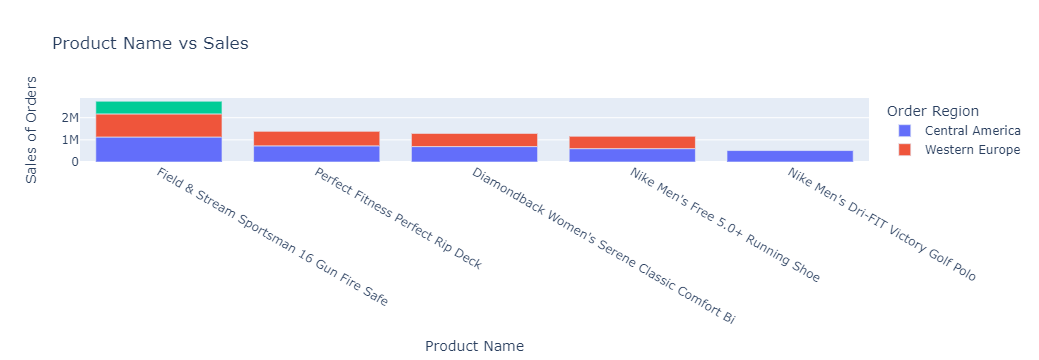

In [36]:
px.bar(df_product_region.head(10),x='Product Name',y='Sales of Orders',color='Order Region',title='Product Name vs Sales')

#### e) Category name

In [37]:
df_sales_category = df.groupby(['Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_sales_category.head()

Category Name  Sales of Orders
18           Fishing     6.929654e+06
12            Cleats     4.431943e+06
9   Camping & Hiking     4.118426e+06
10  Cardio Equipment     3.694843e+06
47   Women's Apparel     3.147800e+06

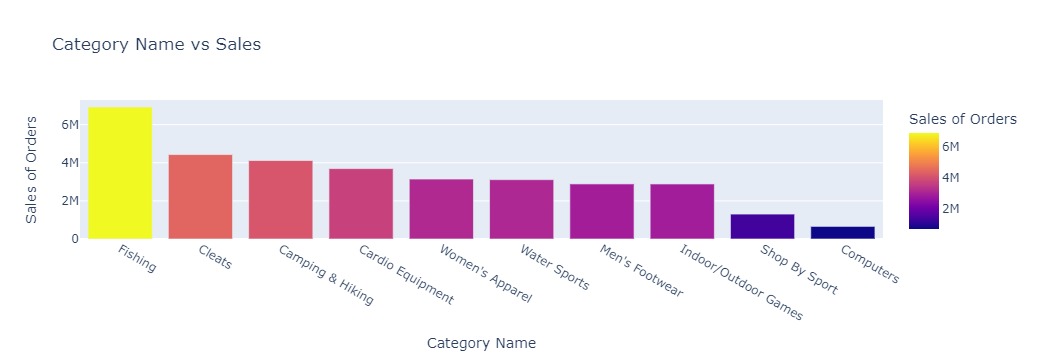

In [38]:
px.bar(df_sales_category.head(10),x='Category Name',y='Sales of Orders',color='Sales of Orders',title='Category Name vs Sales')

#### f) Type vs Sales

In [39]:
df_sales_payment_methond = df.groupby(['Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_sales_payment_methond

Type  Sales of Orders
1     DEBIT     1.407686e+07
3  TRANSFER     1.019490e+07
2   PAYMENT     8.490351e+06
0      CASH     4.022624e+06

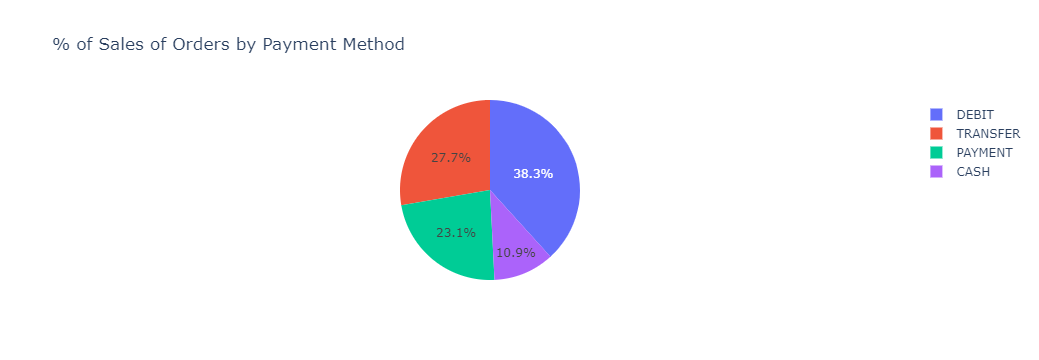

In [40]:
px.pie(df_sales_payment_methond,values='Sales of Orders',names='Type',title='% of Sales of Orders by Payment Method')

#### g) Type vs Sales (color=Product Name)

In [41]:
df_sales_productname_type = df.groupby(['Type','Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_sales_productname_type.head(10)

Type                                   Product Name  Sales of Orders
141     DEBIT      Field & Stream Sportsman 16 Gun Fire Safe     2.635068e+06
376  TRANSFER      Field & Stream Sportsman 16 Gun Fire Safe     1.906705e+06
188     DEBIT               Perfect Fitness Perfect Rip Deck     1.705336e+06
259   PAYMENT      Field & Stream Sportsman 16 Gun Fire Safe     1.623519e+06
138     DEBIT  Diamondback Women's Serene Classic Comfort Bi     1.576395e+06
178     DEBIT              Nike Men's Free 5.0+ Running Shoe     1.395260e+06
423  TRANSFER               Perfect Fitness Perfect Rip Deck     1.227755e+06
176     DEBIT           Nike Men's Dri-FIT Victory Golf Polo     1.219650e+06
187     DEBIT                    Pelican Sunstream 100 Kayak     1.164142e+06
373  TRANSFER  Diamondback Women's Serene Classic Comfort Bi     1.148623e+06

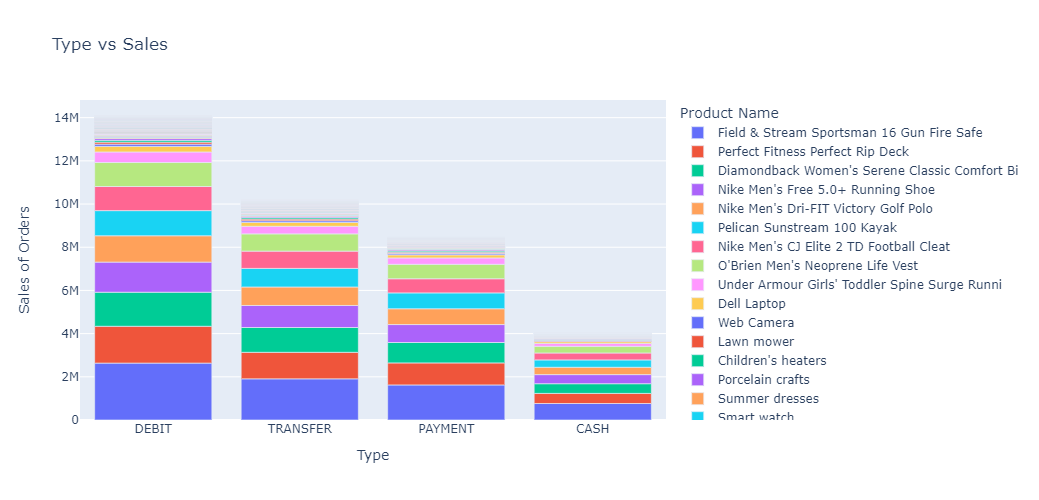

In [42]:
px.bar(df_sales_productname_type,x='Type',y='Sales of Orders',color='Product Name',height=500,title='Type vs Sales')

## 7. DateTime

In [43]:
df_orderdate = df[['order date (DateOrders)','Sales']]
df_orderdate=df_orderdate.rename(columns={'order date (DateOrders)':'order_date'})
df_orderdate['order_date'] = pd.to_datetime(df_orderdate['order_date'],errors='ignore')

In [44]:
df_orderdate.head()

order_date   Sales
0 2018-01-31 22:56:00  327.75
1 2018-01-13 12:27:00  327.75
2 2018-01-13 12:06:00  327.75
3 2018-01-13 11:45:00  327.75
4 2018-01-13 11:24:00  327.75

In [45]:
df_orderdate['Year'] = df_orderdate['order_date'].dt.year.astype(str)
df_orderdate['Month'] = df_orderdate['order_date'].dt.month
df_orderdate['Quarter'] = df_orderdate['order_date'].dt.quarter.astype(str)

In [46]:
df_orderdate.head()

order_date   Sales  Year  Month Quarter
0 2018-01-31 22:56:00  327.75  2018      1       1
1 2018-01-13 12:27:00  327.75  2018      1       1
2 2018-01-13 12:06:00  327.75  2018      1       1
3 2018-01-13 11:45:00  327.75  2018      1       1
4 2018-01-13 11:24:00  327.75  2018      1       1

#### a) Year vs Sales

In [47]:
df_sales_year = df_orderdate.groupby(['Year'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_year

Year  Sales of Orders
0  2015     1.234083e+07
1  2016     1.230382e+07
2  2017     1.180844e+07
3  2018     3.316501e+05

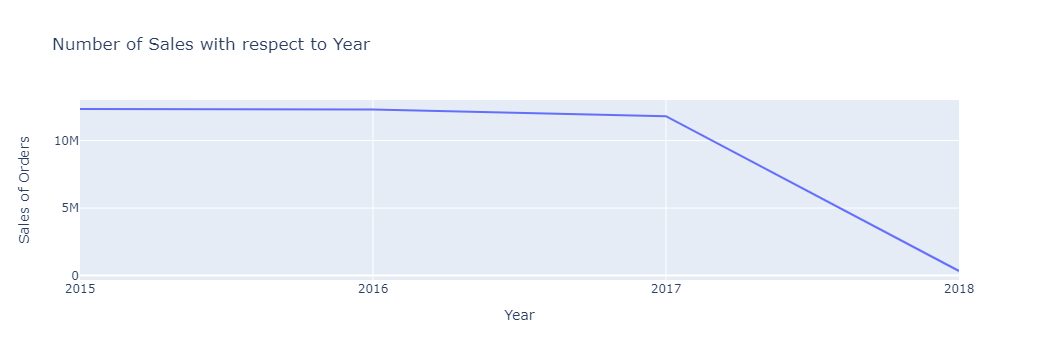

In [48]:
fig = px.line(df_sales_year,x='Year',y='Sales of Orders',title='Number of Sales with respect to Year')
fig.show()

#### b) Quarter vs Sales

In [49]:
df_sales_quarterly = df_orderdate.groupby(['Quarter'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_quarterly

Quarter  Sales of Orders
0       1     9.472446e+06
1       2     9.298513e+06
2       3     9.539713e+06
3       4     8.474064e+06

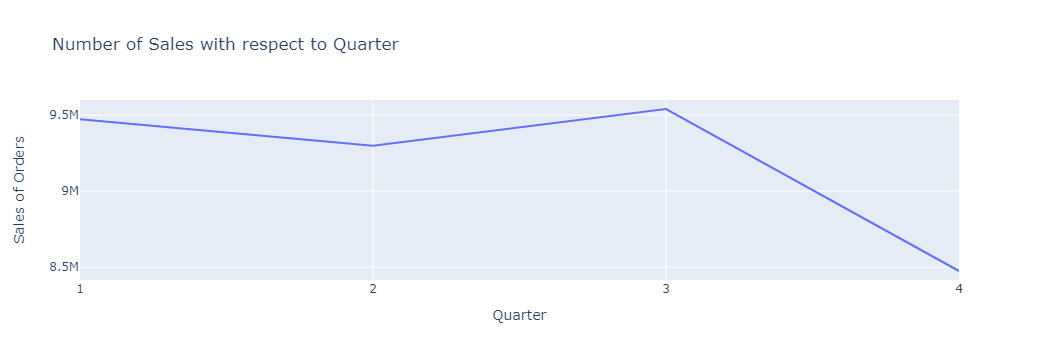

In [50]:
px.line(df_sales_quarterly,x='Quarter',y='Sales of Orders',title='Number of Sales with respect to Quarter')

#### c) Month vs Sales

In [51]:
df_sales_monthly = df_orderdate.groupby(['Month'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders',ascending=False)
df_sales_monthly

Month  Sales of Orders
0       1     3.459246e+06
6       7     3.188170e+06
7       8     3.187032e+06
4       5     3.185364e+06
9      10     3.171279e+06
8       9     3.164511e+06
2       3     3.125112e+06
5       6     3.059152e+06
3       4     3.053996e+06
1       2     2.888088e+06
10     11     2.703625e+06
11     12     2.599160e+06

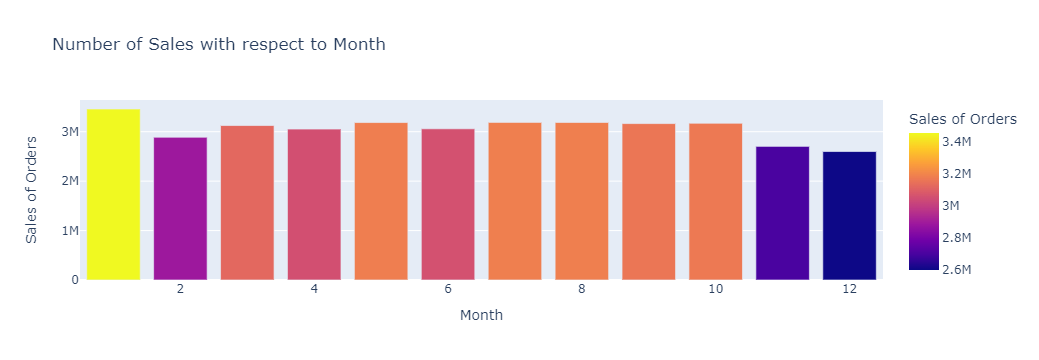

In [52]:
px.bar(df_sales_monthly,x='Month',y='Sales of Orders',color='Sales of Orders',title='Number of Sales with respect to Month')

In [53]:
df.head()

Type  Benefit per order  Sales per customer   Delivery Status  \
0     DEBIT          91.250000          314.640015  Advance shipping   
1  TRANSFER        -249.089996          311.359985     Late delivery   
2      CASH        -247.779999          309.720001  Shipping on time   
3     DEBIT          22.860001          304.809998  Advance shipping   
4   PAYMENT         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  \
0                   0  Sporting Goods        Caguas      Puerto Rico   
1                   1  Sporting Goods        Caguas      Puerto Rico   
2                   0  Sporting Goods      San Jose          EE. UU.   
3                   0  Sporting Goods   Los Angeles          EE. UU.   
4                   0  Sporting Goods        Caguas      Puerto Rico   

   Customer Id Customer Segment Customer State  Customer Zipcode  \
0        20755         Consumer             PR             725.0   
1        19492         Consumer             PR             725.0   
2        19491         Consumer             CA           95125.0   
3        19490      Home Office             CA           90027.0   
4        19489        Corporate             PR             725.0   

  Department Name   Latitude   Longitude        Market  Order City  \
0         Fitness  18.251453  -66.037056  Pacific Asia      Bekasi   
1         Fitness  18.279451  -66.037064  Pacific Asia     Bikaner   
2         Fitness  37.292233 -121.881279  Pacific Asia     Bikaner   
3         Fitness  34.125946 -118.291016  Pacific Asia  Townsville   
4         Fitness  18.253769  -66.037048  Pacific Asia  Townsville   

  Order Country  Order Customer Id order date (DateOrders)  Order Id  \
0     Indonesia              20755         1/31/2018 22:56     77202   
1         India              19492         1/13/2018 12:27     75939   
2         India              19491         1/13/2018 12:06     75938   
3     Australia              19490         1/13/2018 11:45     75937   
4     Australia              19489         1/13/2018 11:24     75936   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360            13.110000                      0.04   
1                    1360            16.389999                      0.05   
2                    1360            18.030001                      0.06   
3                    1360            22.940001                      0.07   
4                    1360            29.500000                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  \
0                    1  327.75        314.640015               91.250000   
1                    1  327.75        311.359985             -249.089996   
2                    1  327.75        309.720001             -247.779999   
3                    1  327.75        304.809998               22.860001   
4                    1  327.75        298.250000              134.210007   

     Order Region      Order State     Order Status  Order Zipcode  \
0  Southeast Asia  Java Occidental         COMPLETE            NaN   
1      South Asia         Rajastán          PENDING            NaN   
2      South Asia         Rajastán           CLOSED            NaN   
3         Oceania       Queensland         COMPLETE            NaN   
4         Oceania       Queensland  PENDING_PAYMENT            NaN   

   Product Card Id  Product Category Id  Product Description  \
0             1360                   73             

## 8. Others

#### a) Department Name vs Order Id

In [54]:
df_department_orderID = df.groupby(['Department Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_department_orderID

Department Name  Number of Orders
3             Fan Shop             66861
0              Apparel             48998
6                 Golf             33220
5             Footwear             14525
8             Outdoors              9686
4              Fitness              2479
2           Discs Shop              2026
10          Technology              1465
9             Pet Shop               492
1            Book Shop               405
7   Health and Beauty                362

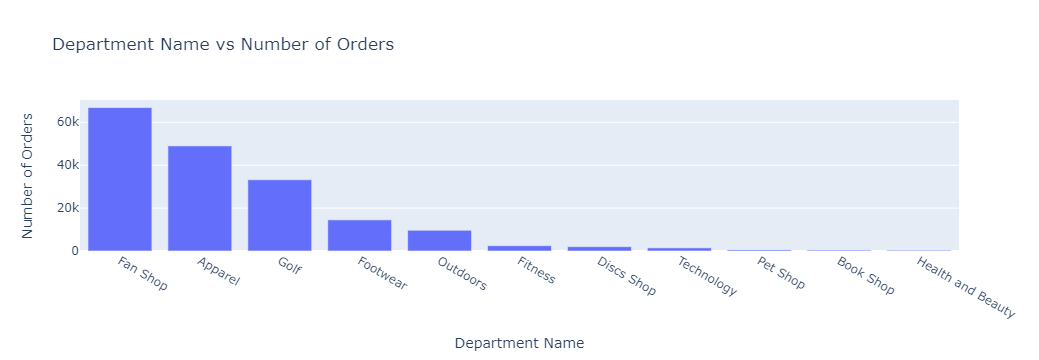

In [55]:
px.bar(df_department_orderID,x='Department Name',y='Number of Orders',title='Department Name vs Number of Orders')

#### b) Order Status vs Order Id

In [56]:
df_orderStatus_orderID = df.groupby(['Order Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_orderStatus_orderID.head()

Order Status  Number of Orders
2         COMPLETE             59491
6  PENDING_PAYMENT             39832
7       PROCESSING             21902
5          PENDING             20227
1           CLOSED             19616

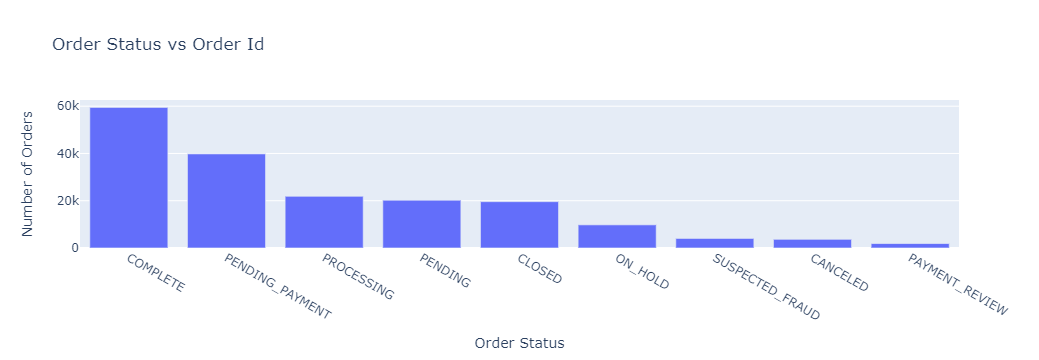

In [57]:
px.bar(df_orderStatus_orderID,x='Order Status',y='Number of Orders',title='Order Status vs Order Id')

#### c) Customer Country , State city vs Order Id

In [58]:
df_customer_country_state_city_orderID = df.groupby(['Customer Country','Customer State','Customer City'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders',ascending=False)
df_customer_country_state_city_orderID.head()

Customer Country Customer State Customer City  Number of Orders
574      Puerto Rico             PR        Caguas             66770
234          EE. UU.             IL       Chicago              3885
85           EE. UU.             CA   Los Angeles              3417
394          EE. UU.             NY      Brooklyn              3412
412          EE. UU.             NY      New York              1816

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

E:\ProgramData\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



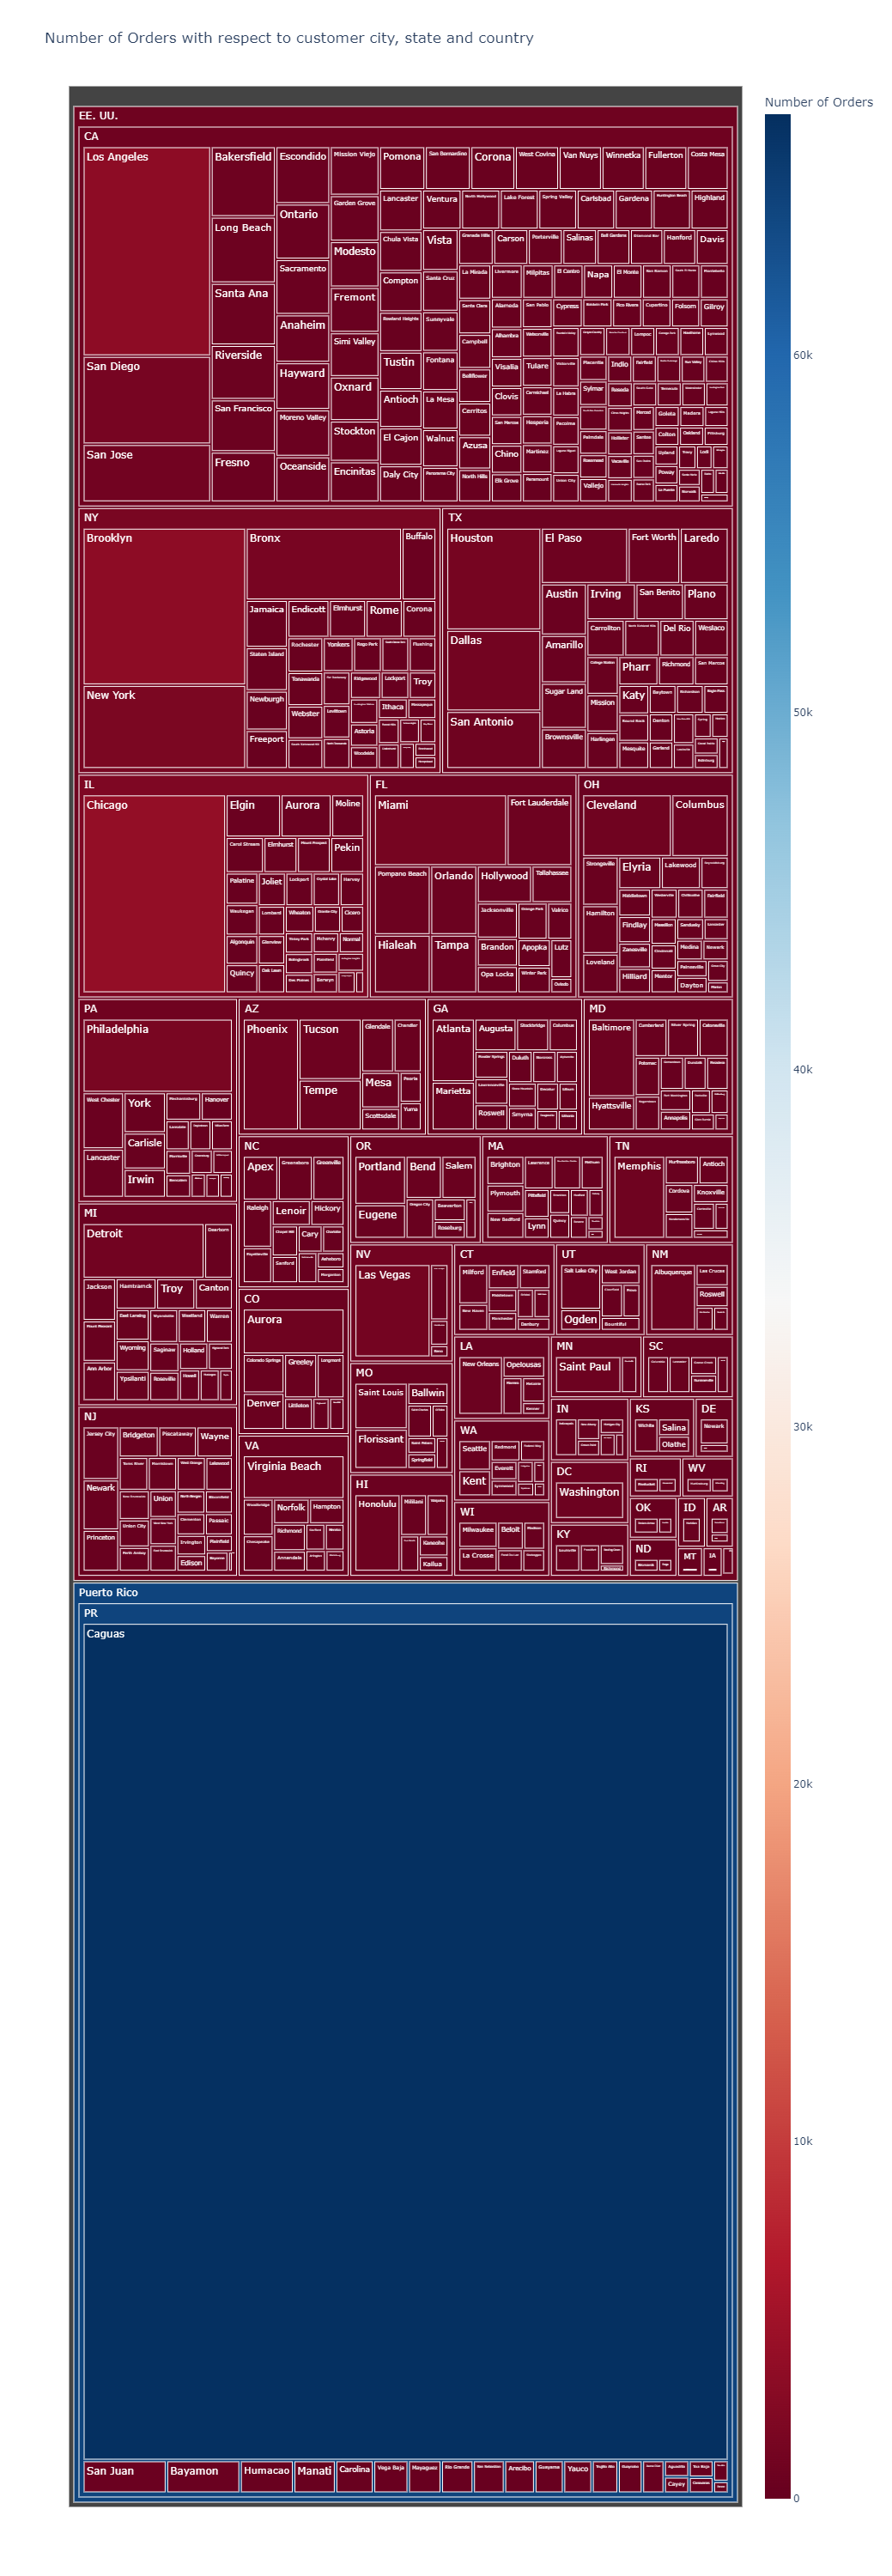

In [59]:
px.treemap(data_frame=df_customer_country_state_city_orderID,
           path=['Customer Country','Customer State','Customer City'],
           values='Number of Orders',
           height=3000,
           color='Number of Orders',
           color_continuous_scale='RdBu',
           title='Number of Orders with respect to customer city, state and country')


#### d) Category Name vs Order Item Discount Rate

In [60]:
df_discount_orderID = df.groupby(['Category Name'])['Order Item Discount Rate'].count().reset_index(name='Discount Rate').sort_values(by='Discount Rate',ascending=False)
df_discount_orderID.head()

Category Name  Discount Rate
12                Cleats          24551
34        Men's Footwear          22246
47       Women's Apparel          21035
30  Indoor/Outdoor Games          19298
18               Fishing          17325

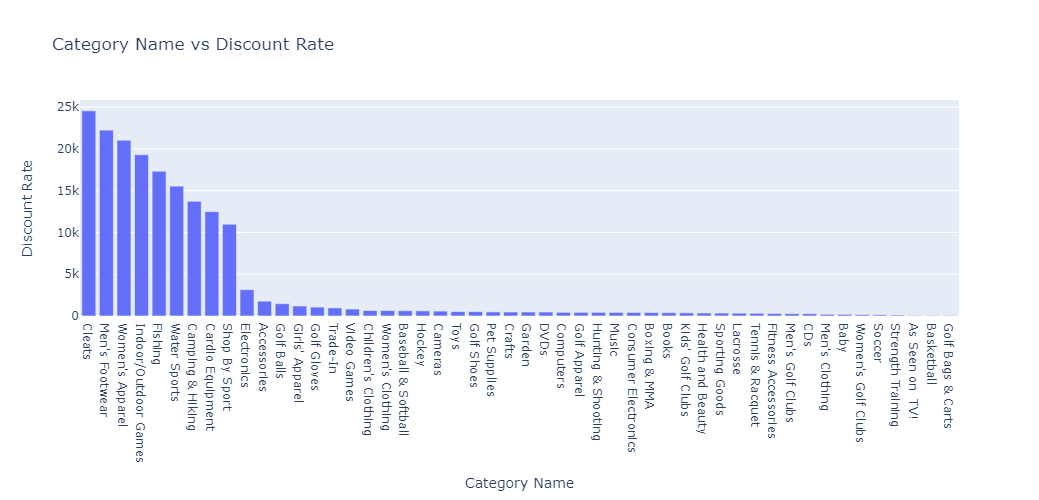

In [61]:
px.bar(df_discount_orderID,x='Category Name',y='Discount Rate',height=500,title='Category Name vs Discount Rate')